<a href="https://colab.research.google.com/github/KristynaPijackova/Exercises/blob/main/Ex_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MPA-MLF, Lab 6 - Feedforward Neural Networks with regularization techniques and hyperparameter tunning

## Exercise 1 - Classification of an images 

The goal of this task will be to create Multi-layer perceptron model, that is able to recognize the  CIFAR10 dataset (https://www.cs.toronto.edu/~kriz/cifar.html). The CIFAR10 dataset consist of 60000 images with resolution of 32x32 pixels. There are 10 classes in total - *airplane*, *automobile*, *bird*, *cat*, *deer*, *dog*, *frog*, *horse*, *ship*, *truck*

These is an example of the dataset:

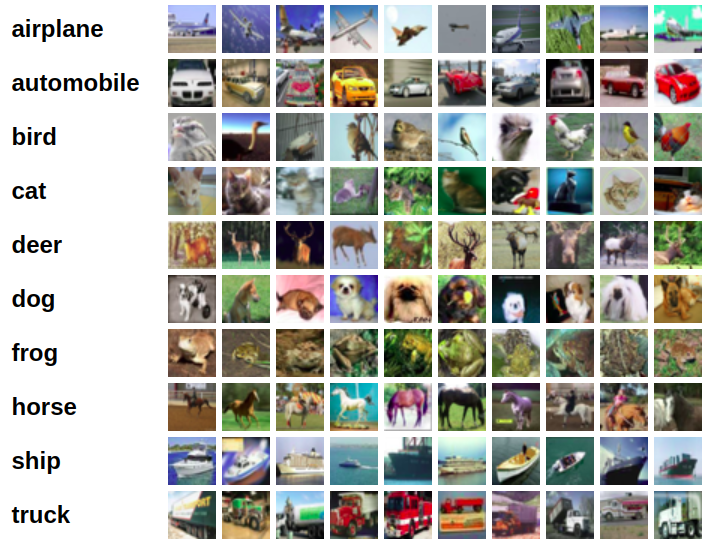

### 0. Import libraries

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import cv2

font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

### 1. Load the Dataset
The dataset is already a part of the Keras library, so we can quickly load it using the following command

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 7s 0us/step


The following numbered labels represent the labels in the dataset:

In [ ]:
labels = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

### 2. Data Examination

Fistly, lets have a look and the couple of images we have,

In [ ]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels_encoded = y_data[selected_ind]
  selected_labels = [labels[x[0]] for x in selected_labels_encoded]

  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img)

  for id_label, label in enumerate(selected_labels):
    plt.text((32/2) + 32*id_label - len(label), 32*(5/4), label)
  plt.axis('off')
  plt.show()



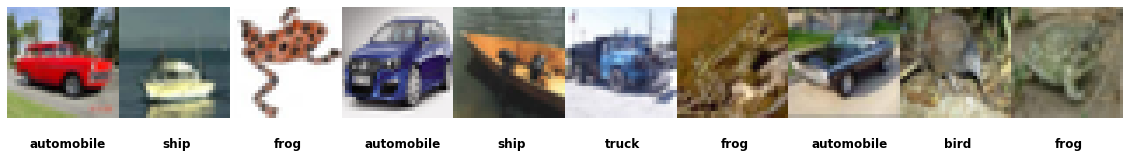

In [ ]:
display_random_images(X_train, y_train)

In [ ]:
#check the shape of image dataset

X_train.shape

(50000, 32, 32, 3)

In our dataset, we have 60000 images with 32x32 resolution. Each image has three channels (R, G, B). We have 50000 images for training and 10000 images for testing. Each channel for each image has values from 0 - 255, where each number represents the pixel intensity. 
With the combination of intensities of R, G and B, you can display up to 16,777,216 different colours (256^3)

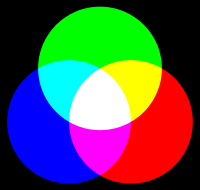

Here you can display each channel separately:

In [ ]:
def display_channels_separately(image: np.array) -> None:

  plt.figure()
  fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))


  axs[0].imshow(image[:,:,0],cmap='Reds')
  axs[1].imshow(image[:,:,1],cmap='Blues')
  axs[2].imshow(image[:,:,2],cmap='Greens')

  axs[3].imshow(image)

  plt.show()

<Figure size 432x288 with 0 Axes>

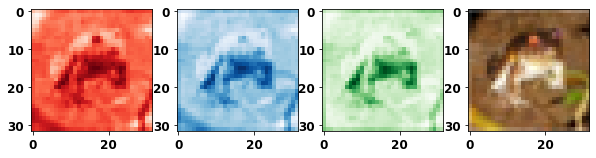

In [ ]:
display_channels_separately(X_train[0])

### 3. Preprocessing of the images

For machine learning purposes, we have to preprocess our images. Firstly we need to scale our images, to scale intensity values from 0-1 (min-max scaling)

In [ ]:
X_train_scaled = X_train.astype('float32') / 255.0

We need to one-hot-encode the labels in our ground truth variable as our second preprocessing.

In [ ]:
y_train_encoded = to_categorical(y_train, num_classes=10)

### 4. Define the model architecture

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

We will define *the Sequential* model as in our last exercise. This time we will use a different approach to determine the input layers. Instead of specifying the *input_dim* parameter in our first hidden layer, we will create a **Flatten** layer that takes our 32x32x3 image and reshapes it into 1x3072. 

We will specify ten neurons in our output layer because we have 10 possible outputs and a **softmax** activation function that returns us a probability distribution over the classes. The class with the highest probability is typically chosen as the predicted class for a given input.

Check the description of our model:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


The next step is to compile our model, we will use *categorical_crossentropy* as a loss function, *stochastic gradient descend* as an optimisation and we will be checking *the accuracy* metric.

In [ ]:
optimizer = SGD(learning_rate = 0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

### 5. Train the model

Our model will be trained in the same way as in our last pc_labs,

In [ ]:
history = model.fit(X_train_scaled, y_train_encoded, epochs=20, batch_size=128, validation_split = 0.2)

Epoch 1/20
313/313 [==============================] - 10s 28ms/step - loss: 2.3229 - accuracy: 0.1293 - val_loss: 2.2842 - val_accuracy: 0.1426
Epoch 2/20
313/313 [==============================] - 4s 12ms/step - loss: 2.2715 - accuracy: 0.1636 - val_loss: 2.2604 - val_accuracy: 0.1747
Epoch 3/20
313/313 [==============================] - 3s 10ms/step - loss: 2.2489 - accuracy: 0.1935 - val_loss: 2.2394 - val_accuracy: 0.2060
Epoch 4/20
313/313 [==============================] - 4s 11ms/step - loss: 2.2285 - accuracy: 0.2176 - val_loss: 2.2195 - val_accuracy: 0.2303
Epoch 5/20
313/313 [==============================] - 3s 10ms/step - loss: 2.2097 - accuracy: 0.2403 - val_loss: 2.2019 - val_accuracy: 0.2440
Epoch 6/20
313/313 [==============================] - 3s 8ms/step - loss: 2.1925 - accuracy: 0.2528 - val_loss: 2.1854 - val_accuracy: 0.2571
Epoch 7/20
313/313 [==============================] - 3s 8ms/step - loss: 2.1764 - accuracy: 0.2642 - val_loss: 2.1701 - val_accuracy: 0.2683


### 6. Model evaluation

In [ ]:
X_test = X_test.astype('float32') / 255.0
y_test_encoded = to_categorical(y_test, num_classes=10)

In [ ]:
score = model.evaluate(X_test, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

Test loss: 2.0386953353881836
Test accuracy: 31.310001015663147 %


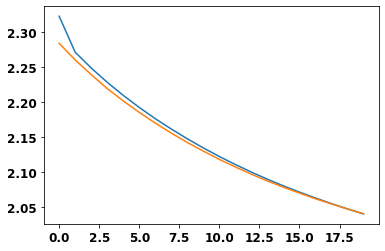

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

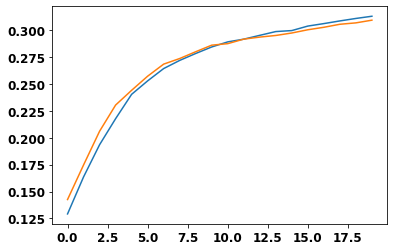

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

As you can see from the evaluation above, we was able to achive approx. 30% of an accuracy. In other word approx. 70% of an images we classified wrongly. That is really bad! 

Lets check the best predictions from our model:

In [ ]:
def show_the_best_predictions(model, x_test: np.array, y_test: np.array, n_of_pred: int = 10) -> None:
  mapping = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

  predictions = model.predict(x_test)
  y_test = y_test.reshape(1,-1)
  predictions_ind = np.argmax(predictions, axis=1)
  predictions_ind = predictions_ind.reshape(1, -1)

  corect_predictions = np.where(predictions_ind == y_test)

  rows_correct = corect_predictions[1]
  predictedtions_correct = predictions[rows_correct]
  target_correct = y_test[0][rows_correct]

  max_samples = predictions[rows_correct, target_correct]
  selected_images = x_test[rows_correct]
  sorted_ind = np.argsort(max_samples)[::-1]


  images = []
  prob = []
  labels = []


  for ind in range(n_of_pred):

    index = sorted_ind[ind]

    labels.append(target_correct[index])
    prob.append(max_samples[index])
    images.append(selected_images[index])

  plt.figure(figsize=(20,10))
  
  images = np.concatenate(np.asarray(images),axis=1)
  plt.imshow(images)
  for ins in range(n_of_pred):
    texts = '{}: \n{:.3f} %'.format(mapping[labels[ins]], prob[ins]*100)
    plt.text((32/2) + 32*ins - len(mapping[labels[ins]]), 32*(5/4), texts)

  plt.axis('off')
  plt.show()


313/313 [==============================] - 1s 3ms/step


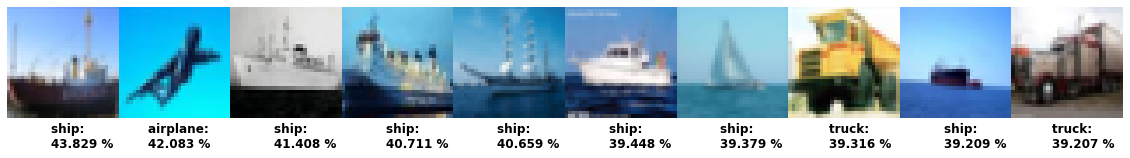

In [ ]:
show_the_best_predictions(model, X_test, y_test)

### Task Description:

You task of this exercise would be to improve the model's performance to achieve better results in image classification task. There is no need to change the preprocessing of the dataset. There are possible way how to improve the models performance:

1. Hyperparameter tunning - change the hyperparameters so that the model will perform better. You can experiment with the following:
 - *changing the number of neurons in the hidden layer*
 - *changing the number of hidden layers*
 - *changing the activation functions*
 - *changing the learning rate*
 - *changing the optimizer* - So far, we have used only Gradient descend as our optimizer, but Keras offers other algorithms that can perform better - check the documentation!
 - *changing the number of learning epochs*\
 - *changing the batch size*

2. Regularization techniques - There are several regularization techniques that can improve the model's performance: 
 - *Dropout* -  In the Keras lib. you can add *dropout layer* into your Sequential model using the following command  *model.add(Dropout(p))* where *p* is an hyperparameter that controls dropout probabily, typical values are 0.1 - 0.5.
 - *L1, L2 regularization* - In keras the regularization is applied for selected layers, there is an example how to add l2 regularization to an layer (for more details check the documnetation):  *model.add(Dense(64, activation='relu', input_dim=100, kernel_regularizer=l2(0.01)))*
 - *Early stopping* -  In Keras, you can use the EarlyStopping callback to implement early stopping in your model. *early_stopping = EarlyStopping(monitor='val_loss', patience=3)*,  *model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping])*


Try to make the highest testing accuracy possible. You can directly edit the code that is presented above, or you can copy everything into new cells. Please submit only the code with the best performance and briefly describe what approaches you have tried and what were the results

### WRITE YOUR DESCRIPTION IN THIS CELL ###

🐕 - Cute doggo to catch your attention to the description... 

(and here's a cat 🐈, in case you are a cat person...)

I've used keras tuner to find the best possible hyperparameters (in the time I've allowed it to work) - you can see the implementation bellow. Basicaly, it could choose whether to use 1, 2 or 3 dense layers and with what number of units, whether to add Dropout layer or not and with what dropout rate. And what learning rate it should use - as an optimizer, I chose Adam.

I've tried running it with RandomSearch and Bayesian Optimizer (I like that one better, I guess)

The best accuracy achieved on the test set was around 51.6% which is still quite poor, but for an MLP okay-ish, I guess :)


...and bellow's the same but for CNN, though I don't know at this point of time if I manage to run it all, but you can play with it if you'd like 🙃

..the cnn is overfitted...but well.. no time to correct that anyway 🙃

### Voluntary task: 
Implement one of the hyperparameter tunning algorithms discussed in the lecture, such as *Grid Search*, *Random Search* or more sophisticated ones. Some of these algorithms are already included in the Keras. Check the documentation

In [ ]:
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.5 MB/s eta 0:00:00


In [ ]:
import keras_tuner
from tensorflow import keras
from keras import layers

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten())

    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(
            layers.Dense(
                # units = hp.Int(f'units_{i}', min_value=16, max_value=256, step=32),
                units = hp.Choice(f'units_{i}', [64, 128, 256, 512, 1024]),
                activation = hp.Choice('activation', ['swish', 'leakyrelu', 'sigmoid'])))
    if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=hp.Float("dr", min_value=0.2, max_value=0.8, step=0.2)))
    model.add(Dense(10, activation='softmax'))
    learning_rate = hp.Float('lr', min_value=1e-4, max_value=1e-2, sampling='log')
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model    

In [ ]:
hypermodel = build_model(keras_tuner.HyperParameters())

In [ ]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    overwrite=True, 
    directory='/content/hp_tuning',
    project_name='cifar10_hp_nn',
)

In [ ]:
bayes_tuner = keras_tuner.BayesianOptimization(
    hypermodel=build_model,
    objective='val_accuracy',
    max_trials=20,
    num_initial_points=None,
    alpha=0.0001,
    beta=2.6,
    seed=None,
    overwrite=True, 
    directory='/content/hp_tuning_bayes',
    project_name='cifar10_hp_nn_bayes',
)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'leakyrelu', 'tanh', 'sigmoid'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [ ]:
bayes_tuner.search_space_summary()

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': 'linear'}
units_0 (Choice)
{'default': 64, 'conditions': [], 'values': [64, 128, 256, 512, 1024], 'ordered': True}
activation (Choice)
{'default': 'swish', 'conditions': [], 'values': ['swish', 'leakyrelu', 'sigmoid'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [ ]:
tuner.search(X_train_scaled, y_train_encoded, epochs=20, batch_size=128, validation_split = 0.2)

Trial 3 Complete [00h 01m 42s]
val_accuracy: 0.40219999849796295

Best val_accuracy So Far: 0.4127500057220459
Total elapsed time: 00h 06m 32s


In [ ]:
bayes_tuner.search(X_train_scaled, y_train_encoded, epochs=10, batch_size=256, validation_split = 0.2)

Trial 20 Complete [00h 02m 24s]
val_accuracy: 0.41029998660087585

Best val_accuracy So Far: 0.4975999891757965
Total elapsed time: 00h 21m 32s


In [ ]:
# Get the top 2 models.
models = tuner.get_best_models(num_models=2)
best_model = models[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
best_model.build(input_shape=(None, 32, 32, 3))
best_model.summary()

In [ ]:
# Get the top 2 models.
models = bayes_tuner.get_best_models(num_models=2)
best_model = models[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
best_model.build(input_shape=(None, 32, 32, 3))
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,640,330
Trainable params: 1,640,330
Non-trainable params: 0
_________________________________________________________________


In [ ]:
best_model.fit(X_train_scaled, y_train_encoded, epochs=30, batch_size=256, validation_split = 0.2)

Epoch 1/30
157/157 [==============================] - 10s 56ms/step - loss: 1.3445 - accuracy: 0.5229 - val_loss: 1.4508 - val_accuracy: 0.4909
Epoch 2/30
157/157 [==============================] - 8s 54ms/step - loss: 1.3249 - accuracy: 0.5296 - val_loss: 1.4731 - val_accuracy: 0.4800
Epoch 3/30
157/157 [==============================] - 9s 58ms/step - loss: 1.2911 - accuracy: 0.5414 - val_loss: 1.4189 - val_accuracy: 0.5060
Epoch 4/30
157/157 [==============================] - 8s 54ms/step - loss: 1.2642 - accuracy: 0.5484 - val_loss: 1.4073 - val_accuracy: 0.5083
Epoch 5/30
157/157 [==============================] - 8s 53ms/step - loss: 1.2449 - accuracy: 0.5580 - val_loss: 1.4259 - val_accuracy: 0.5060
Epoch 6/30
157/157 [==============================] - 10s 65ms/step - loss: 1.2226 - accuracy: 0.5690 - val_loss: 1.3925 - val_accuracy: 0.5137
Epoch 7/30
157/157 [==============================] - 9s 58ms/step - loss: 1.1974 - accuracy: 0.5754 - val_loss: 1.3874 - val_accuracy: 0.51

KeyboardInterrupt: ignored

### 6. Model evaluation

In [ ]:
score = best_model.evaluate(X_test, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

Test loss: 1.4173179864883423
Test accuracy: 51.63999795913696 %


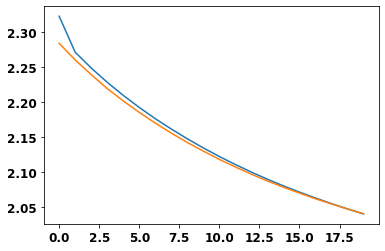

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

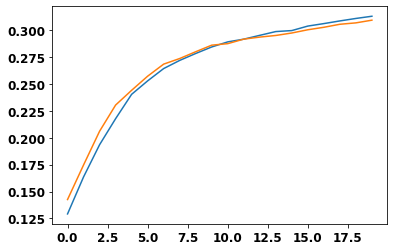

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

As you can see from the evaluation above, we was able to achive approx. 30% of an accuracy. In other word approx. 70% of an images we classified wrongly. That is really bad! 

Lets check the best predictions from our model:

313/313 [==============================] - 2s 7ms/step


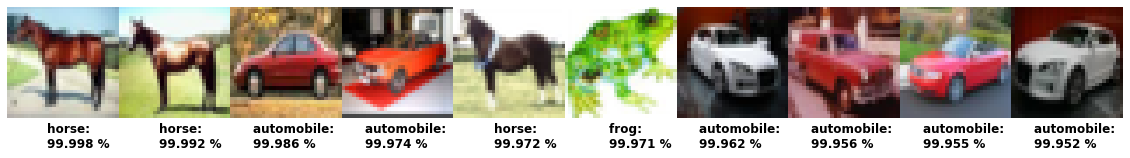

In [ ]:
show_the_best_predictions(best_model, X_test, y_test)

# Convolutional neural network

In [ ]:
def build_conv_model(hp):
    model = keras.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))

    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(
            layers.Conv2D(
                filters = hp.Choice(f'filters_{i}', [32, 64, 128, 256]),
                kernel_size = hp.Choice(f'kernels_{i}', [1, 3, 5]),
                activation = hp.Choice('activation', ['swish', 'leakyrelu'])))
        model.add(layers.Dropout(rate=hp.Float("dr", min_value=0.2, max_value=0.8, step=0.2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    learning_rate = hp.Float('lr', min_value=1e-4, max_value=1e-2, sampling='log')
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model    

In [ ]:
conv_hypermodel = build_conv_model(keras_tuner.HyperParameters())

In [ ]:
bayes_tuner = keras_tuner.BayesianOptimization(
    hypermodel=build_conv_model,
    objective='val_accuracy',
    max_trials=5,
    num_initial_points=None,
    alpha=0.0001,
    beta=2.6,
    seed=None,
    overwrite=True, 
    directory='/content/hp_tuning_bayes_conv',
    project_name='cifar10_hp_conv_bayes',
)

In [ ]:
bayes_tuner.search_space_summary()

Search space summary
Default search space size: 6
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': 'linear'}
filters_0 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128, 256], 'ordered': True}
kernels_0 (Choice)
{'default': 1, 'conditions': [], 'values': [1, 3, 5], 'ordered': True}
activation (Choice)
{'default': 'swish', 'conditions': [], 'values': ['swish', 'leakyrelu'], 'ordered': False}
dr (Float)
{'default': 0.2, 'conditions': [], 'min_value': 0.2, 'max_value': 0.8, 'step': 0.2, 'sampling': 'linear'}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [ ]:
bayes_tuner.search(X_train_scaled, y_train_encoded, epochs=10, batch_size=256, validation_split = 0.2)

Trial 5 Complete [00h 00m 00s]

Best val_accuracy So Far: 0.6485999822616577
Total elapsed time: 00h 07m 50s


In [ ]:
# Get the top 2 models.
models = bayes_tuner.get_best_models(num_models=2)
best_model = models[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
best_model.build(input_shape=(None, 32, 32, 3))
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 256)       205056    
                                                                 
 dropout (Dropout)           (None, 28, 28, 256)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 256)       590080    
                                                                 
 dropout_1 (Dropout)         (None, 26, 26, 256)       0         
                                                                 
 flatten (Flatten)           (None, 173056)            0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
best_model.fit(X_train_scaled, y_train_encoded, epochs=1, batch_size=256, validation_split = 0.2)

Epoch 1/30
157/157 [==============================] - 32s 196ms/step - loss: 0.4636 - accuracy: 0.8386 - val_loss: 1.2661 - val_accuracy: 0.6309
Epoch 2/30


KeyboardInterrupt: ignored

### 6. Model evaluation

In [ ]:
score = best_model.evaluate(X_test, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

NameError: ignored

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

As you can see from the evaluation above, we was able to achive approx. 30% of an accuracy. In other word approx. 70% of an images we classified wrongly. That is really bad! 

Lets check the best predictions from our model:

In [ ]:
show_the_best_predictions(best_model, X_test, y_test)

NameError: ignored